# Creating Clustering data set  
# Implementing and validating KMeans Clustering Algorithm 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Creating Dataset using Using Cholesky Decomposition 
#### Covariance Matrix = L * transpose(L)
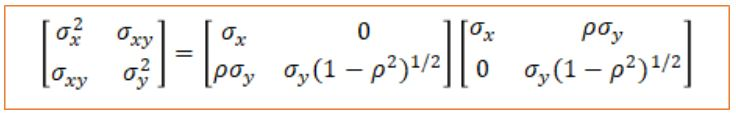
####   One Data point = Mean+(Lower Triangular matrix * Random normal)

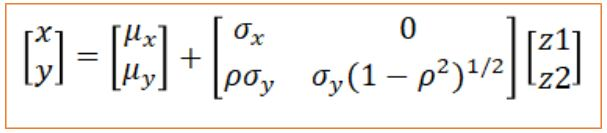

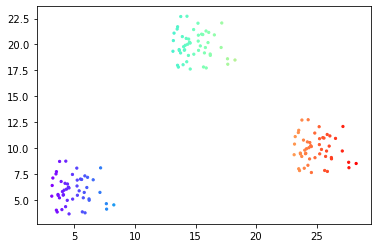

In [2]:
np.random.seed(0)
Mu1 = np.array([5,6])
Mu2 = np.array([25,10])
Mu3 = np.array([15,20])
Sigma = np.array([[2,0],[0,2]]) #[[VarX,CoVarXY],[CoVarXY,VarY]] # 2x2
N = 50
[a] = Mu1.shape
[b] = Mu2.shape
[c] = Mu3.shape
Data1 = np.empty([N, a])
Data2 = np.empty([N, b])
Data3 = np.empty([N, c])
for i in range(N):
    Lower_tri = np.linalg.cholesky(Sigma) # 2x2
    Upper_tri = Lower_tri.T
    Random_nor = np.random.normal(0,1,a) # 2x1
    Random_nor = np.random.normal(0,1,b)
    Random_nor = np.random.normal(0,1,c)
    Data1[i,:]=np.dot(Lower_tri,Random_nor)+Mu1 #2x1
    Data2[i,:]=np.dot(Lower_tri,Random_nor)+Mu2
    Data3[i,:]=np.dot(Lower_tri,Random_nor)+Mu3
    
Data = np.vstack((Data1,Data2,Data3))

plt.scatter(Data[:,0],Data[:,1],c=Data[:,0],s=5,cmap='rainbow')

In [3]:
target1 = np.tile(np.argmax([1,0,0]),(50,1))
target2 = np.tile(np.argmax([0,1,0]),(50,1))
target3 = np.tile(np.argmax([0,0,1]),(50,1))
y = np.vstack((target1,target2,target3))
X = Data

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,  test_size=0.2, shuffle=True, random_state=42)

In [33]:
def Clustering(k,iterations,data):
    np.random.seed(0)
    Distance=np.zeros(shape=(len(data),k))
    Random_points = np.random.randint(len(data),size=k)  # 3x1 3 random rows indixes were selected from the Data
    Clusters = data[Random_points] #3x2
    for i in range(1,iterations):
        for j in range(1,k+1):
            Cluster_centre = np.tile(Clusters[j-1],(int(len(data)),1)) #150x2
            Distance[:,j-1] = np.sum((data-Cluster_centre)**2,axis=1) #one iteration-150x1 end of loop 150x4
        min_distance_indices = np.argmin(Distance,axis=1) #150x1
        for p in range(k):
            temp = np.where(min_distance_indices == p) 
            Clusters[p,:] = np.mean(data[temp],axis=0) #3x2
    return Clusters,min_distance_indices

In [8]:
def Test_Clustering(k,iterations,data,Clusters):
    np.random.seed(0)
    Distance=np.zeros(shape=(len(data),k))
    for i in range(1,iterations):
        for j in range(1,k+1):
            Cluster_centre = np.tile(Clusters[j-1],(int(len(data)),1)) #150x2
            Distance[:,j-1] = np.sum((data-Cluster_centre)**2,axis=1) #one iteration-150x1 end of loop 150x4
        min_distance_indices = np.argmin(Distance,axis=1) #150x1
    return min_distance_indices

In [9]:
Clusters = Clustering(3,4,X_train)
Prediction = Test_Clustering(3,4,X_test,Clusters[0])

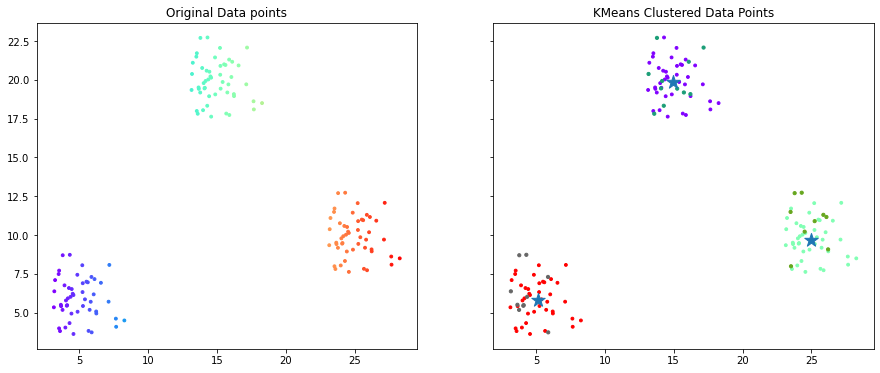

In [35]:
f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,6))
ax1.set_title('Original Data points')
ax1.scatter(Data[:,0],Data[:,1],c=Data[:,0],s=8,cmap='rainbow')
ax2.set_title('KMeans Clustered Data Points')
ax2.scatter(X_train[:,0],X_train[:,1],c=Clusters[1],s=8,cmap='rainbow')
ax2.scatter(X_test[:,0],X_test[:,1],c=Prediction,s=10,cmap='Dark2')
ax2.scatter(Clusters[0][:,0],Clusters[0][:,1],marker='*',s=200)

In [11]:
from sklearn.metrics import *
def accuracy_plotting(data,data_target):
    accuracy=[]
    for j in range(1,10):
        centroid,y_pred=Clustering(j,10,data)
        acc= accuracy_score(data_target,y_pred)
        accuracy.append(acc)
    return accuracy

C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


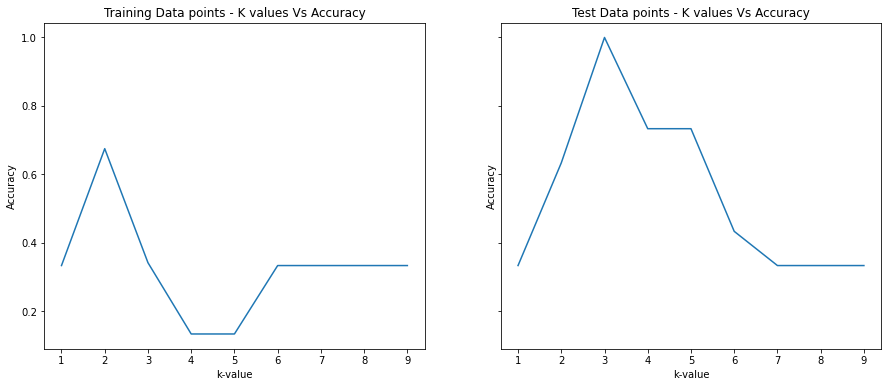

In [12]:
accuracy_train = accuracy_plotting(X_train,y_train)
accuracy_test = accuracy_plotting(X_test,y_test)

f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,6))
ax1.set_title('Training Data points - K values Vs Accuracy')
ax1.set_xlabel('k-value')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,10),accuracy_train)
ax2.set_title('Test Data points - K values Vs Accuracy')
ax2.set_xlabel('k-value')
ax2.set_ylabel('Accuracy')
ax2.plot(range(1,10),accuracy_test)

In [21]:
def Optimum_Clusters(clusters,iterations):
    for i in range(1,clusters):
        for j in range(1,iterations):
            if np.all(Clustering(i,j)[0] == Clustering(i,j+1)[0]):
                break
    return i,j

In [27]:
Optimum_Clusters(8,100)

(7, 5)

In [28]:
def Optimum_K_value(Clusters,X_train,y_pred):
    twcss=[]
    iterations=100
    for j in range(1,10):
        centroid,y_pred=Clustering(j,iterations,X_train)
        XY_T=pd.DataFrame(X_train,columns=['F0','F1'])  #112x2
        Y_T=pd.DataFrame(y_pred,columns=['Label'])  #112x1
        XY=pd.concat([XY_T, Y_T], axis=1)  #112x3
        d={}
        for z in range(j):
            d[z] = np.array(XY[XY["Label"]==z][['F0','F1']])  # for k value 3, d[0]=0matchedx2,d[1]=1matchedx2,d[2]=2matchedx2
        wcss=0
        for i in range(j):     # # Calculating the distance between the datapoints of same class with its respective centroid 
            wcss+=np.sum((d[i]-centroid[i,:])**2) #1x1  # Repeating the same for k number of cluster present and summing all                          
        twcss.append(wcss) #1x1
    return twcss

C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret =

Text(0, 0.5, 'within cluster sum of squares')

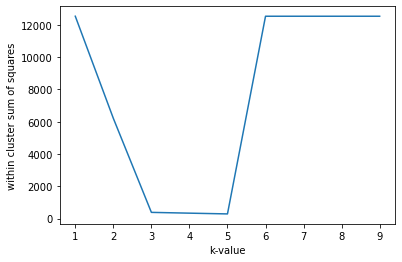

In [34]:
WCSS = Optimum_K_value(Clusters[0],X_train,Clusters[1])
plt.plot(range(1,10),WCSS)
plt.xlabel('k-value')
plt.ylabel('within cluster sum of squares')